In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanumgothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd

In [14]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC(C=1, gamma=1)
svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

print('Test Score {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Test Score 0.972


## 6.1 데이터 전처리와 매개변수 선택

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print('Best Crossvalidation Score : {:.3f}'.format(grid.best_score_))
print('Test Score : {:.3f}'.format(grid.score(X_test_scaled, y_test)))
print('Best Parameter : ', grid.best_params_)

Best Crossvalidation Score : 0.981
Test Score : 0.972
Best Parameter :  {'C': 1, 'gamma': 1}


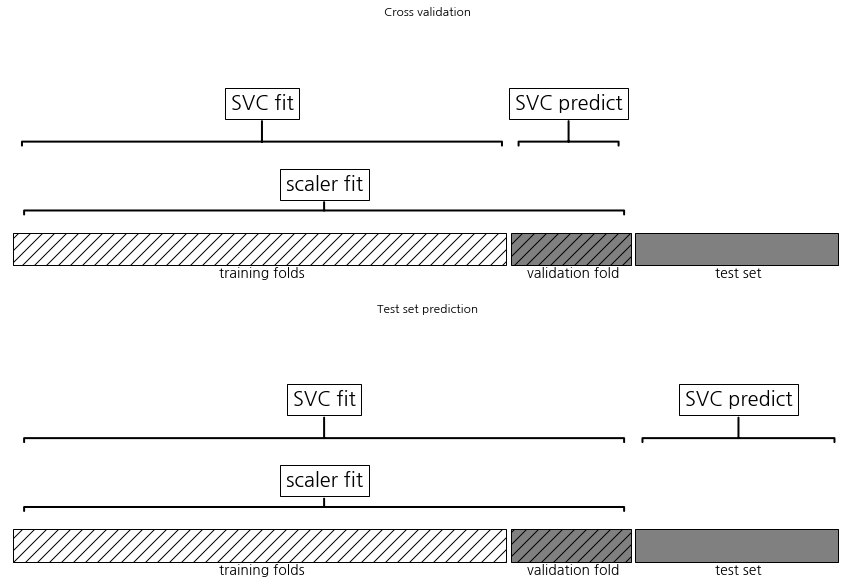

In [18]:
import mglearn
mglearn.plots.plot_improper_processing()

## 6.2 Pipleline 구축하기

In [19]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [21]:
print('Test Score : {:.3f}'.format(pipe.score(X_test, y_test)))

Test Score : 0.951


## 6.3 그리드 서치에 파이프라인 적용하기

In [24]:
param_grid = {
    'svm__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}

In [25]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print('Best Crossvalidation Score : {:.3f}'.format(grid.best_score_))
print('Test Score : {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Parameter : ', grid.best_params_)

Best Crossvalidation Score : 0.981
Test Score : 0.972
Best Parameter :  {'svm__C': 1, 'svm__gamma': 1}


## 6.4 파이프라인 인터페이스

In [29]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), SVC(C=100))
print(pipe.steps)

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.fit(cancer.data)
components = pipe.named_steps['pca'].components_
print('components.shape:', components.shape)

components.shape: (2, 30)


## 6.5 전처리와 모델의 매개변수를 위한 그리드 서치

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [36]:
param_grid = {'polynomialfeatures__degree':[1,2,3], 'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [37]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

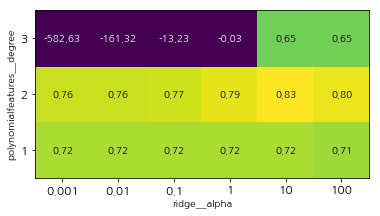

In [40]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                     xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                     xticklabels=param_grid['ridge__alpha'],
                     yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [41]:
print('Best Parameter : ', grid.best_params_)

Best Parameter :  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [42]:
print('Test Score : {:.3f}'.format(grid.score(X_test, y_test)))

Test Score : 0.768


## 6.6 모델 선택을 위한 그리드 서치

In [43]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [44]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier':[RandomForestClassifier(n_estimators=100)], 
     'preprocessing':[None],
     'classifier__max_features': [1,2,3]}
]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best Crossvalidation Score : {:.3f}'.format(grid.best_score_))
print('Test Score : {:.3f}'.format(grid.score(X_test, y_test)))
print('Best Parameter : ', grid.best_params_)

Best Crossvalidation Score : 0.986
Test Score : 0.979
Best Parameter :  {'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [47]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())], memory='cache_folder')